In [82]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [83]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'],columns = iris['feature_names'])
y = pd.DataFrame(iris['target'],columns = ['target'])
data = pd.concat([x,y],axis = 1)
data.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


### Matplotlib

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

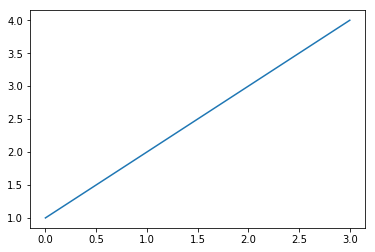

In [10]:
plt.plot([1,2,3,4])  #只有y軸的資料，x軸是電腦自訂的

Text(0.5,0,'x label')

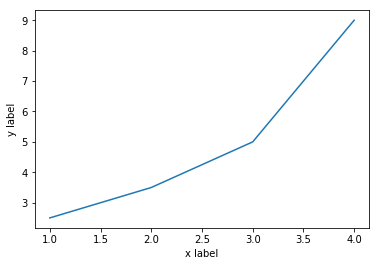

In [12]:
plt.plot([1,2,3,4],[2.5,3.5,5,9])
plt.ylabel('y label')
plt.xlabel('x label')

[0, 6, 0, 10]

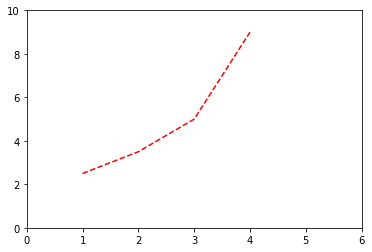

In [20]:
plt.plot([1,2,3,4],[2.5,3.5,5,9],'r--')
plt.axis([0,6,0,10]) #指定Ｘ軸Ｙ軸範圍(X:0-6;Y:0-10)

t: [1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.  4.2 4.4
 4.6 4.8]


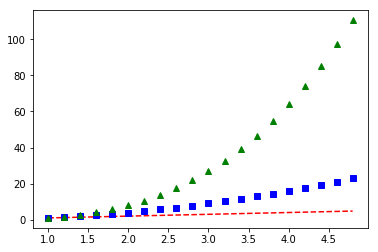

In [21]:
# evenly sampled time at 200ms intervals
t = np.arange(1., 5., 0.2)
print("t: " + str(t))
# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')

<BarContainer object of 50 artists>

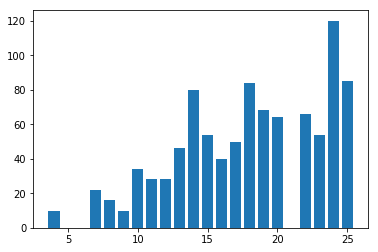

In [22]:
x = [4, 4, 7, 7, 8, 9, 10, 10, 10, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 16, 16, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 20, 20, 20, 20, 20, 22, 23, 24, 24, 24, 24, 25]
y = [2, 10, 4, 22, 16, 10, 18, 26, 34, 17, 28, 14, 20, 24, 28, 26, 34, 34, 46, 26, 36, 60, 80, 20, 26, 54, 32, 40, 32, 40, 50, 42, 56, 76, 84, 36, 46, 68, 32, 48, 52, 56, 64, 66, 54, 70, 92, 93, 120, 85]
plt.bar(x, y)  #直方圖

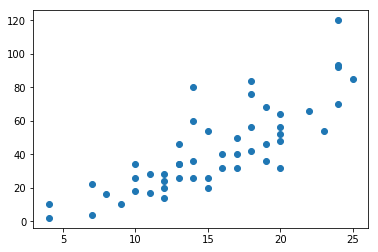

In [24]:
plt.scatter(x, y) #散布圖

### pandas plot

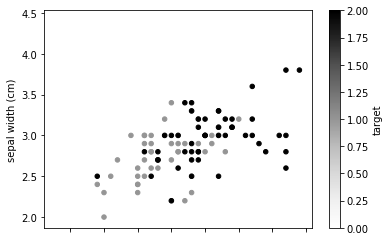

In [28]:
data.plot.scatter(x = 'sepal length (cm)',y = 'sepal width (cm)',c = 'target')

In [30]:
col_fun = {
    0:'r',
    1:'g',
    2:'b'
}

In [37]:
data['color'] = data['target'].map(col_fun)

In [38]:
data.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,color
0,5.1,3.5,1.4,0.2,0,r
1,4.9,3.0,1.4,0.2,0,r


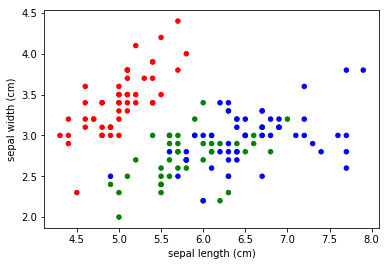

In [39]:
data.plot.scatter(x = 'sepal length (cm)',y = 'sepal width (cm)',c = data['color'])  #這邊c = 沒[]會有錯誤！

### 加標籤

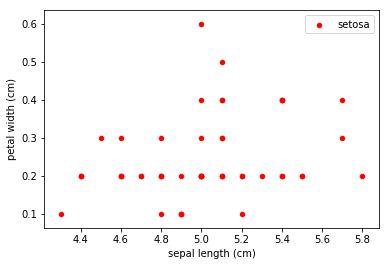

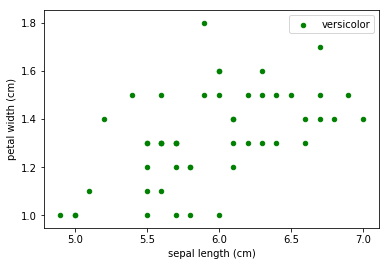

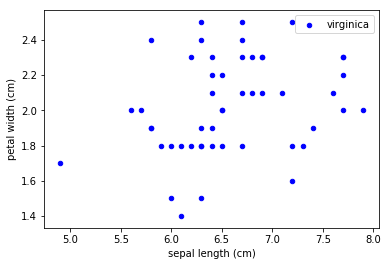

In [40]:
#前面先篩選類別(==0;==1;==2)
iris_data[iris_data['target']==0].plot.scatter(x='sepal length (cm)', y='petal width (cm)',color='r', label='setosa') 
iris_data[iris_data['target']==1].plot.scatter(x='sepal length (cm)', y='petal width (cm)',color='g', label='versicolor')
iris_data[iris_data['target']==2].plot.scatter(x='sepal length (cm)', y='petal width (cm)',color='b', label='virginica')

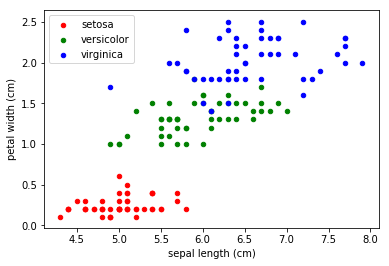

In [43]:
#先將第一個散布圖存在ax, ax=ax將兩圖做結合
ax = iris_data[iris_data['target']==0].plot.scatter(x='sepal length (cm)', y='petal width (cm)',color='r', label='setosa')
ax = iris_data[iris_data['target']==1].plot.scatter(x='sepal length (cm)', y='petal width (cm)',color='g', label='versicolor',ax=ax)
iris_data[iris_data['target']==2].plot.scatter(x='sepal length (cm)', y='petal width (cm)',color='b', label='virginica',ax=ax)

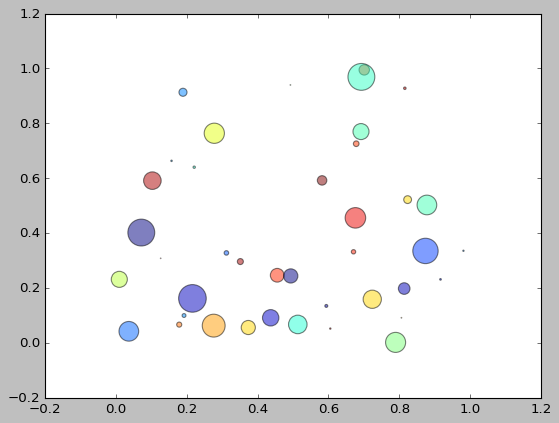

In [63]:
N = 40
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5) #s控制範圍

In [60]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [66]:
plt.style.use('bmh')

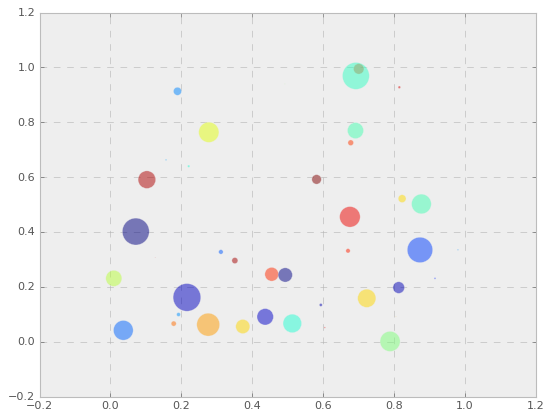

In [67]:
plt.scatter(x, y, s=area, c=colors, alpha=0.5)

### Seaborn - code is simple, pic is more beautiful

In [68]:
import seaborn as sns

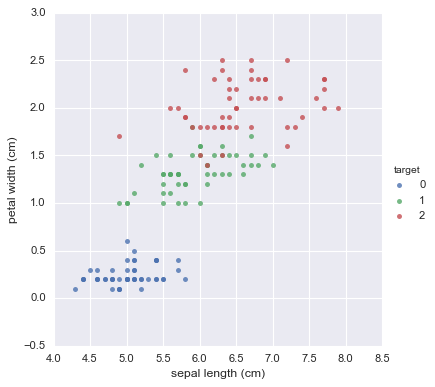

In [69]:
sns.lmplot('sepal length (cm)','petal width (cm)',data=data, fit_reg=False, hue='target')

In [70]:
name = {
    0:'setosa',
    1:'versicolor',
    2:'virginica'
}
data['target_name'] = data['target'].map(name)

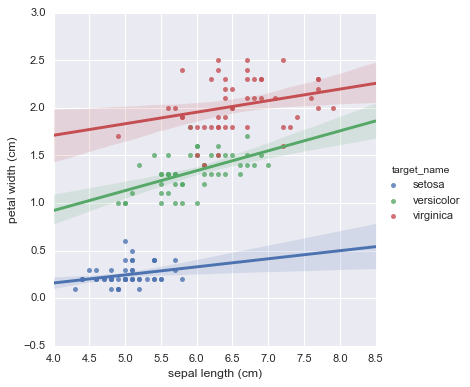

In [74]:
sns.lmplot('sepal length (cm)','petal width (cm)',data=data, hue='target_name') #拿掉fit_reg=False 就會有回歸線，所以如果只要散佈圖，要加上fit_reg=False

In [76]:
import plotly
from plotly.graph_objs import Scatter, Layout
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot({
    "data": [Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": Layout(title="picture show")
})

In [77]:
import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np

N = 1000
random_x = np.random.randn(N)
random_y = np.random.randn(N)

# Create a trace
trace = go.Scatter(
    x = random_x,
    y = random_y,
    mode = 'markers'
)
data = [trace]

# Plot and embed in ipython notebook!
plotly.offline.iplot(data, filename='basic-scatter')
# or plot with: plot_url = py.plot(data, filename='basic-line') 以html的方式呈現

In [78]:
plotly.offline.plot(data, filename='basic-scatter') #it will show as html

/usr/local/anaconda3/lib/python3.6/site-packages/plotly/offline/offline.py:459: UserWarning:

Your filename `basic-scatter` didn't end with .html. Adding .html to the end of your file.



'file:///Users/you/Desktop/py_3/hahow/basic-scatter.html'

In [89]:
spc0 = go.Scatter(
    x = data[data['target'] == 0]['sepal length (cm)'],
    y = data[data['target'] == 0]['sepal width (cm)'],
    mode = 'markers',
    name = 'setosa'
)
spc1 = go.Scatter(
    x = data[data['target'] == 1]['sepal length (cm)'],
    y = data[data['target'] == 1]['sepal width (cm)'],
    mode = 'markers',
    name = 'versicolor'
)
spc2 = go.Scatter(
    x = data[data['target'] == 2]['sepal length (cm)'],
    y = data[data['target'] == 2]['sepal width (cm)'],
    mode = 'markers',
    name = 'virginica'
)

In [90]:
plt_data = [spc0,spc1,spc2]
plotly.offline.iplot(plt_data, filename='basic-scatter')

###  3D pretice

In [97]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np


x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3),400).transpose()
tracel = go.Scatter3d(
    x = x,
    y = y,
    z = z,
    mode = 'markers',
    marker = dict(size = 12,color = z,colorscale = 'Viridis',opacity = 0.8)
)
threeDate = [tracel]
layout = go.Layout(
    margin = dict(l=0,r=0,b=0,t=0)
)
fig = go.Figure(data = threeDate,layout = layout)
plotly.offline.plot(fig, filename='3D-scatter')

/usr/local/anaconda3/lib/python3.6/site-packages/plotly/offline/offline.py:459: UserWarning:

Your filename `3D-scatter` didn't end with .html. Adding .html to the end of your file.



'file:///Users/you/Desktop/py_3/hahow/3D-scatter.html'